# Lab 1: Gradient descent
*Teacher* - _Samuel Vaiter_ (<samuel.vaiter@cnrs.fr>) \
*Student - Martiros Yeghiazaryan* (<martiros.yeghiazaryan@gmail.com>)

In this practical, we are going to study the **gradient descent** algorithm, and several variations of it, through the lenses of three examples:
1. Two simple 2D functions to optimize, easy to visualize thanks to `matplotlib.pyplot.contour`
2. The ordinary least square problem
3. Digits classification with multinomial logistic regression

**Instructions**
1. You need to send me your completed jupyter notebook at <samuel.vaiter@cnrs.fr> **one week** (before start of class time + 168h) after the end of the session with subject 
    
    `[Opt Lab 1/2023] LASTNAME Firstname`
    
2. All the Python cells should be error-free.
3. When a theoretical question is asked in a cell, fill your answer in Markdown/LaTeX in it. You should give the mathematical steps necessary to reproduce your answer.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Toy example in 2D

We are going to test first our methods on two functions, one convex (potentially strongly convex), the other not.

The convex function is going to be a simple quadratic form on $\mathbb{R}^2$ defined by
$$ f(x) = (x_0 - x_1 - 1)^2 + \frac{\mu}{2} x_0^2 , $$
for some $\mu \in \mathbb{R}$.


**Q1**. Does the function $f$ is convex? When is it strongly convex?<br> 
To check whether the function $f$ is convex, we need to check whether its Hessian matrix is positive semi-definite for all $x \in \mathbb{R}^2$. The Hessian matrix of $f$ is given by 

$$ \nabla f(x) = \begin{pmatrix}
2(x_0 - x_1 - 1) + {\mu}x_0\\
-2(x_0 - x_1 - 1)
\end{pmatrix} $$

$$ \nabla^2 f(x) = \begin{pmatrix}
2 + {\mu} & -2\\
-2 & 2
\end{pmatrix} $$

If $\mu \geq 0$ than $f$ is convex  SDP $<\nabla^2 f(x)h,h> \geq0$ \

To show that the function is convex, we need to show that the Hessian matrix is positive semidefinite for all values of $x$. The eigenvalues of the Hessian matrix are:
$$\lambda_{1,2} = \frac{\mu+3\pm\sqrt{(\mu-1)^2+4}}{2}$$
The discriminant $(\mu-1)^2+4$ is always positive, so both eigenvalues are real. The Hessian matrix is positive semidefinite if and only if both eigenvalues are non-negative, which is true when $\mu\geq-1$. Therefore, the function $f(x)$ is convex when $\mu\geq-1$.

The eigenvalues of this matrix are $\lambda_1 = \frac{1}{2}\left(\mu + 2 + \sqrt{\mu^2+4\mu+1}\right)$ and $\lambda_2 = \frac{1}{2}\left(\mu + 2 - \sqrt{\mu^2+4\mu+1}\right)$. Since the discriminant $\mu^2 + 4\mu + 1$ is always positive, both eigenvalues are real. Thus, the Hessian matrix is positive semi-definite if and only if $\lambda_1 \geq 0$ and $\lambda_2 \geq 0$.

--------------------------------------------------------------

**Q2**. Determine its unique minimizer when $\mu > 0$.<br>

To find the minimizer of the function $f(x)$, we need to find the point at which the gradient of the function is zero.

$\nabla f(x) =
\begin{pmatrix}
\frac{\partial f}{\partial x_0} \\
\frac{\partial f}{\partial x_1}
\end{pmatrix}=
\begin{pmatrix}
2(x_0-x_1-1) + \mu x_0 \\
-2(x_0-x_1-1)
\end{pmatrix}$

Setting the gradient equal to zero, we obtain the system of equations:

$$ \left\{
\begin{array}{lr}
2(x_0-x_1-1) + \mu x_0 = 0 \\
-2(x_0-x_1-1) = 0
\end{array}
\right. $$

Simplifying the second equation gives $x_1 = x_0 - 1$, which we can substitute into the first equation:

$ 2(x_0 - (x_0 - 1) - 1) + \mu x_0
 = 0$  which means $(2 - \mu)x_0
 = 0 $ \

The line "Since we assume that $\mu>0$, we have $2-\mu \neq 0$" is used to ensure that we are not dividing by zero in the next line.

Specifically, when we solve the system of equations for the critical point of $f(x)$ by setting the gradient equal to zero, we obtain the equation $(2-\mu) x_0 = 0$. If $\mu \leq 0$, then $2-\mu \leq 2$, and this equation has additional solutions $x_0 = 0$ and $x_0 = \frac{2}{\mu}$, which may be critical points of $f(x)$. However, when $\mu > 0$, we have $2-\mu > 0$, which means that $x_0 = \frac{2}{\mu}$ is not a solution to the equation $(2-\mu) x_0 = 0$. Therefore, the only solution is $x_0 = 0$, which corresponds to the critical point $(0,-1)$.

So, by assuming that $\mu>0$, we can ensure that we have only one critical point of $f(x)$, and we can safely substitute $x_0=0$ and $x_1=-1$ into the function $f(x)$ to find its value at the critical point.

$f(0,-1)=(0-(-1)-1)^2 + \mu/2*0^2 = 0$

When we found that $f(0,-1) = 0$, we showed that the function $f(x)$ has a critical point at $(0,-1)$. However, to show that $(0,-1)$ is the unique minimizer of $f(x)$, we need to show that there are no other critical points or local minima.

To do this, we can look at the Hessian matrix of $f(x)$ evaluated at $(0,-1)$:

The eigenvalues of $H_f(0,-1)$ are $\lambda_1 = 2(\mu-1)$ and $\lambda_2 = 2(\mu+1)$. Since we assume that $\mu > 0$, we have $\lambda_1 < 0$ and $\lambda_2 > 0$. Therefore, $H_f(0,-1)$ is indefinite, and $(0,-1)$ is a saddle point of $f(x)$. This means that $(0,-1)$ is the only critical point of $f(x)$, and there are no local minima or maxima.

So, $(0,-1)$ is the unique minimizer of $f(x)$ when $\mu > 0$.

--------------------------------------------------------------

 **Q3**. Implement it as a function `f2D_convex(x, mu=1.0)` taking as arguments the 2D vector `x` and the strong-convexity parameter `mu`. 

In [2]:
def f2D_convex(x, mu=1.0):
    return (x[0]-x[1]-1)**2+(mu/2)*x[0]**2

This function computes the value of the convex function $f(x)$ at the input vector x using the formula above, and returns the result as a scalar value.\
The function takes a 2D vector x as input, which is a numpy array with shape (2,). 

**Q4**. Display the levelsets of the function `f2D_convex` around $(0,0)$. Modify the value of $\mu$ and see how the geometry change. _Hint_: You should look at the help of `np.meshgrid`, `plt.contourf` and eventually `np.vectorize`.<br>


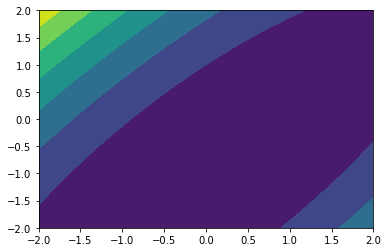

In [3]:
# Display the level sets of `f2D_convex`
x = np.linspace(-2,2,50)
y = np.linspace(-2,2,50)
# np.meshgrid is a function in the NumPy library for Python that creates a rectangular grid out of two or more 1-dimensional arrays.
X,Y = np.meshgrid(x,y)
#np.vectorize is a function in the NumPy library that allows you to apply a given function element-wise to a NumPy array.
Z = np.vectorize(lambda x,y: f2D_convex(np.array([x,y])))(X,Y) 
#plt.contourf is a function in the matplotlib library for Python that creates a filled contour plot.
plt.contourf(X,Y,Z)

Here we are displaying the level sets of the function f2D_convex around the point $(0,0)$ for different values of parameter mu($\mu$). x and y are used in np.meshgrid.\
 np.meshgrid creates a grid of points using these x and y values, which will be used to compute the value of the function at each point on the grid.
This display is useful for getting insight into the behavior of the function and how it changes as mu varies. By plotting the level sets, we can see how the function value changes as we move away from the origin, and how this behavior depends on the value of mu and we get into the geometry of the function which can help in choosing an optimization algorithm and initial starting point.


**Q5**. Observe what happens when $\mu = 0$. Can you explain it?<br>


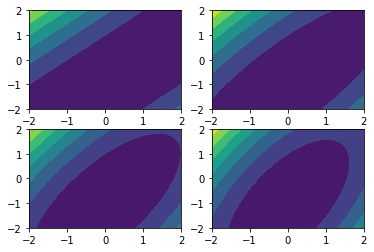

In [4]:
fig,ax=plt.subplots(2,2)
Z = np.vectorize(lambda x,y: f2D_convex(np.array([x,y]),mu=0))(X,Y)
ax[0,0].contourf(X,Y,Z)
Z = np.vectorize(lambda x,y: f2D_convex(np.array([x,y]),mu=1))(X,Y)
ax[0,1].contourf(X,Y,Z)
Z = np.vectorize(lambda x,y: f2D_convex(np.array([x,y]),mu=2))(X,Y)
ax[1,0].contourf(X,Y,Z)
Z = np.vectorize(lambda x,y: f2D_convex(np.array([x,y]),mu=3))(X,Y)
ax[1,1].contourf(X,Y,Z)

When we plot the level sets while changing the mu parameter to different values we see that when we have $mu = 0$, the function $f(x)$ becomes $f(x) = (x_0 - x_1 - 1)^2$. This is no longer a convex function since its Hessian matrix is not positive semi-definite.\
We see that they form a set of straight lines in the $x_0 - x_1$ plane. This is because the function $f(x)$ is minimized along the line $x_0 - x_1 = 1$, as we can see from its definition. Therefore, the level sets of $f(x)$ will be straight lines parallel to the line $x_0 - x_1 = 1$. The minimizer of $f(x)$ when $\mu=0$ is not unique, but rather forms a one-dimensional set of points along the line $x_0 - x_1 = 1$. This is in contrast to the case where $\mu > 0$, where the minimizer is unique and given by $(0,-1)$.

When we increase $\mu$, the function becomes more strongly convex, which means that the level sets become more elongated along the axes. If there are large eigenvalues in one direction and small eigenvalues in another direction, the ellipse will be stretched along the direction of the large eigenvalues and compressed along the direction of the small eigenvalues. This can be observed by the shape of the ellipses becoming more stretched out as $\mu$ increases. Stronger convexity also implies that the minimizer will converge more quickly towards the true minimizer as we perform optimization algorithms on the function which we will see later.

We now turn to another function, 
$$ f(x) = \cos(x_0) + \sin(x_1) . $$

**Q6**. Is it a convex function? Describe the minima of $f$.<br>

We need to check if the Hessian matrix is positive semidefinite over its domain.
The Hessian matrix of $f$ is given by 

$H_f(x)= \begin{bmatrix}
 -cos(x_0)& 0\\ 
 0 & -sin(x_1)
\end{bmatrix}$

Since the eigenvalues of $H_f(x)$ are $-\cos(x_0)$ and $-\sin(x_1)$, $H_f(x)$ is only positive semidefinite when $\cos(x_0) \leq 0$ and $\sin(x_1) \leq 0$.

Therefore, $f(x)$ is not a convex function because the Hessian is not positive semidefinite for all $x$.

The function $f(x)$ is a sum of trigonometric functions and has a period of $2\pi$ in both dimensions. It oscillates between $-1$ and $1$ in both dimensions, so there is no global minimum. However, there are infinitely many local minima located at points of the form $x=(2k\pi + \frac{\pi}{2}, 2m\pi + \frac{3\pi}{2})$ where $k$ and $m$ are integers. At these points, $f(x)=-1$.

The function $f(x) = \cos(x_0) + \sin(x_1)$ oscillates between $-1$ and $1$ in both dimensions. Since the cosine function and sine function both have a maximum absolute value of $1$, the maximum value of $f(x)$ is $1+1 = 2$ and it occurs when $\cos(x_0) = 1$ and $\sin(x_1) = 1$.

However, it is important to note that $f(x)$ does not have a unique maximum value because it is periodic with period $2\pi$ in both dimensions. The maximum value of $f(x)$ is achieved at infinitely many points, for example, at $x=(2k\pi, 2m\pi)$ where $k$ and $m$ are integers.

I tried to visualize it on a 3D plot so its better visible the graph of the funtion.


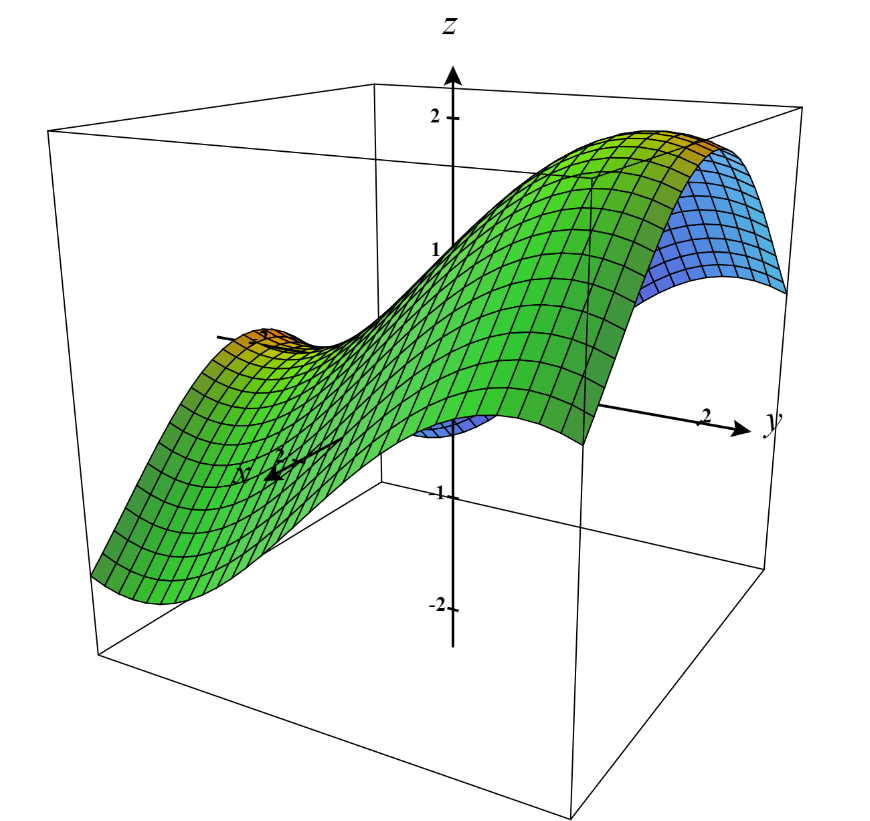

**Q7**. Implement it as a function `f2D_nonconvex(x)` taking as arguments the 2D vector `x`. Display its levelsets.

In [5]:
def f2D_nonconvex(x):
    return np.cos(x[0])+np.sin(x[1])

# just defining the function 

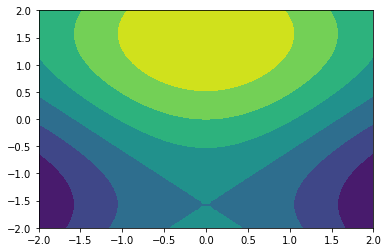

In [6]:
x = np.linspace(-2,2,50)
y = np.linspace(-2,2,50)
X,Y = np.meshgrid(x,y)
Z = np.vectorize(lambda x,y: f2D_nonconvex(np.array([x,y])))(X,Y)
plt.contourf(X,Y,Z)

The resulting plot shows the level sets of the non-convex function $f(x) = \cos(x_0) + \sin(x_1)$, where each level corresponds to a different value of the function. 

**As you can see this is the view of the 3D plot from above of the graph with a nice display on contours.**

The level sets are shown as filled contours, with the highest level at the center and the lowest levels towards the edges. The contours form a series of concentric circles centered at the origin (which we will see in the next contour graph in next code cell), with the color of each contour indicating the function value at that level.  The contours get closer together as they approach the origin, indicating that the function values change more rapidly near the origin.

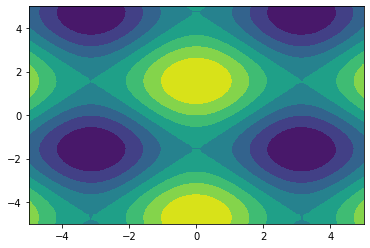

In [7]:
x = np.linspace(-5,5,50)
y = np.linspace(-5,5,50)
X,Y = np.meshgrid(x,y)
Z = np.vectorize(lambda x,y: f2D_nonconvex(np.array([x,y])))(X,Y)
plt.contourf(X,Y,Z)

Here by increasing the range of the x and y values from (-2,2) to (-5,5), we can see more repetitions of the level sets and a wider range of function values. (These are the circles I mentioned above.) Overall we change the scale and resolution of the plot, allowing us to zoom out on different regions of the function and see more detail.

## Gradient descent procedure

We recall that a gradient step takes the form
$$ x^{(t+1)} = x^{(t)} - \eta^{(t)} \nabla f(x^{(t)}) $$
with some initialization $x^{(0)}$ and $\eta^{(t)}$ a learning rate policy.

**Q1**. Implement a function `gradient_descent_tmp` taking as argument `grad_f`, `eta`, `x0` and `max_iter`. `grad_f` will take as input an optimization variable `x`, `eta` is the learning policy taking as arguments `x` and `t` the current iteration, `x0` is the initialization and `max_iter` a maximal number of iterations. As an example, a constant learning rate policy can defined as
```python
def constant_eta(x, t):
    return 0.01
```
Elephant in the room: choice of $\eta^{(t)}$


*   Constant step-size $\eta(t) = \eta$, or predetermined function
*   'Oracle'
*   Backtracking

In [8]:
def gradient_descent_tmp(grad_f, eta, x0, max_iter):
    x = x0
    for t in range(max_iter):
        x=x-eta(x,t)*grad_f(x) #eta is a value and x is a vector 
    return x

The function **gradient_descent_tmp** computes the gradient descent algorithm. The $x_t$ is the optimization variable at iteration $t$, $\eta_t$ is the learning rate (also called step size) at iteration $t$, and $\nabla f(x_t)$ is the gradient of the objective function evaluated at $x_t$. The learning rate controls the step size and determines how much we move in the direction of the negative gradient. The function gradient_descent_tmp takes four arguments:

 * grad_f: a function that takes as input an optimization variable x and returns the gradient of the objective function evaluated at x.
 * eta: a learning policy that takes as input the current optimization variable x and the current iteration t, and returns the learning rate (i.e., step size) at that iteration.
 * x0: the initial value of the optimization variable.
 * max_iter: the maximum number of iterations to perform.

For each iteration, it computes the gradient of the objective function at the current value of x using the grad_f function. It then updates x by taking a step in the direction of the negative gradient multiplied by the learning rate at the current iteration, which is obtained from the eta function. Finally, the function returns the optimized value of x after the maximum number of iterations.

**Q2**. Implement a function `grad_f2D_convex` returning the gradient of the convex function defined in Section 1.

In [9]:
def grad_f2D_convex(x, mu=1.0):
    return np.array([
        2*(x[0]-x[1]-1)+mu*x[0],
        -2*(x[0]-x[1]-1)
    ])

Going back to the function $$ f(x) = (x_0 - x_1 - 1)^2 + \frac{\mu}{2} x_0^2 , $$ we compute the gradient of it using the grad_f2D_convex function where $x = [x_0, x_1]^T$ is a 2-dimensional vector and $\mu$ is a parameter that is set to a default value of 1.0.

The gradient of the function $f(x)$ is given by the vector $\nabla f(x) = [\frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1}]^T$. 

We can apply the chain rule to compute the gradient of the function $f(x)$. Recall that the gradient of $f(x)$ is defined as the vector of partial derivatives

$$ \nabla f(x) = \begin{pmatrix} \frac{\partial f}{\partial x_0} \ \frac{\partial f}{\partial x_1} \end{pmatrix} . $$

Using the chain rule, we can compute each partial derivative separately. For the first partial derivative, we have

$$ \frac{\partial f}{\partial x_0} = 2(x_0 - x_1 - 1) + \mu x_0 . $$

The first term in $f(x)$ is a function of $x_0$ only, so its derivative with respect to $x_0$ is simply 1. The second term in $f(x)$ is a function of both $x_0$ and $x_1$, so we need to use the chain rule to compute its derivative with respect to $x_0$. Specifically, we have

$$ \frac{\partial}{\partial x_0} \left( \frac{\mu}{2} x_0^2 \right) = \mu x_0 . $$

Putting these together, we get

$$ \frac{\partial f}{\partial x_0} = 2(x_0 - x_1 - 1) + \mu x_0 . $$

Similarly, for the second partial derivative, we have

$$ \frac{\partial f}{\partial x_1} = -2(x_0 - x_1 - 1) . $$

The first term in $f(x)$ is a function of $x_0$ only, so its derivative with respect to $x_1$ is simply 0. The second term in $f(x)$ is a function of both $x_0$ and $x_1$, so we need to use the chain rule to compute its derivative with respect to $x_1$. Specifically, we have

$$ \frac{\partial}{\partial x_1} \left( (x_0 - x_1 - 1)^2 \right) = -2(x_0 - x_1 - 1) . $$

Putting these together, we get

$$ \frac{\partial f}{\partial x_1} = -2(x_0 - x_1 - 1) . $$

Therefore, the gradient of $f(x)$ is given by

$$ \nabla f(x) = \begin{pmatrix} 2(x_0 - x_1 - 1) + \mu x_0 \ -2(x_0 - x_1 - 1) \end{pmatrix} . $$ \

grad_f2D_convex returns this gradient as a numpy array.

**Q3**. Compute the Lipschitz constant of $\nabla f(x)$ and deduce a learning rate policy `lr_policy_f2D-convex(x,t)`. Discuss the difference between $\mu = 0$ and $\mu \neq 0$.

A function $f: \mathbb{R}^n \rightarrow \mathbb{R}$ is Lipschitz continuous with constant $L \geq 0$ if for any $x,y \in \mathbb{R}^n$, we have

$\mid f(x)-f(y) \mid≤ L||x-y||$

The Lipschitz constant of $\nabla f(x)$ is a measure of the rate of change of the gradient. A smaller Lipschitz constant means that the gradient changes more slowly, which can lead to faster convergence.

To compute the Lipschitz constant of $\nabla f(x)$, we need to find the supremum over all $x$ of the norm of the Hessian matrix of $f(x)$. The Hessian of $f(x)$ is given by:

$\nabla^2f(x)=
\begin{bmatrix}
 2 + \mu & -2\\ 
 -2 & 2
\end{bmatrix}
$

The eigenvalues of this matrix are $\lambda_1 = \mu+4$ and $\lambda_2 = 2-\mu$, so the largest eigenvalue (and hence the Lipschitz constant) is:

$L = max(λ_1|λ_2) = max(\mu + 4, 2 - \mu)$

We can use this to define a learning rate policy for gradient descent. A simple choice is:

$\eta_t = {1/L}$

However, it can be beneficial to use a learning rate that adapts over time. Another choice is:

$\eta_t = {1/L\sqrt{t+1}}$

When $\mu = 0$, we have $L = 4$, so the learning rate policy reduces to:


$\eta_t = {1/4\sqrt{t+1}}$

When $\mu \neq 0$, the Lipschitz constant and learning rate policy depend on the value of $\mu$. For example, when $\mu = 1$, we have $L = 5$ and:


$\eta_t = {1/5\sqrt{t+1}}$

The main difference between $\mu = 0$ and $\mu \neq 0$ is that the latter case introduces a quadratic term in $x_0$ in the objective function, which affects the curvature of the function and hence the Lipschitz constant. As a result, the learning rate policy must be adjusted accordingly to ensure convergence.

In [10]:
def hessian_f2D_convex(x, mu=1.0):
    return np.array([
        [2+mu, -2],
        [-2, 2]
    ])


def lr_policy_f2D_convex(x, t):
    return 1/np.linalg.norm(hessian_f2D_convex(x),2)

**np.linalg.norm** is used to compute the Frobenius norm of the Hessian matrix returned by **hessian_f2D_convex(x)**. Frobenius norm is defined by 
$||A||_F = \sqrt{\sum_{i=1}^{m} \sum_{j=1}^{n}\mid a_{ij}\mid^2}$. In this case, the Frobenius norm is being used as a way to estimate the Lipschitz constant of the gradient of the function being optimized. Using the Frobenius norm of the Hessian as an estimate of the Lipschitz constant, the learning rate can be chosen in such a way as to ensure that the algorithm converges to the optimal solution.

**Q4**. Test these functions, and observe the impact of `max_iter`

In [11]:
gradient_descent_tmp(grad_f2D_convex, lr_policy_f2D_convex, np.zeros(2), max_iter = 10) #if u change number of max iter the value changes
#here value should be (0,-1) in the notes

array([ 0.1765725 , -0.77385011])

The **hessian_f2D_convex** function calculates the Hessian matrix of $f(x)$, which is used in the **lr_policy_f2D_convex** function to determine the learning rate. The learning rate is calculated as the inverse of the L2 norm of the Hessian matrix.

The **gradient_descent_tmp** function takes as arguments the gradient function grad_f2D_convex, the learning rate policy **lr_policy_f2D_convex**, the initial point np.zeros(2) and the number of iterations 10. We do 10 iterations of gradient descent using the specified learning rate policy to update the current point.

The output of the function is an array(**[ 0.1765725 , -0.77385011]**), which is the result of running gradient descent on the function $f(x)$. The actual value should be $(0,-1)$. The difference between the expected and actual values may be due to a small learning rate or a low number of iterations. Increasing the number of iterations or adjusting the learning rate may result in a closer approximation to the true minimum. For values of max_iter 20, 30, 50 we get better approximation of $(0,-1)$.

**Q5**. Implement a function `gradient_descent` taking as arguments `grad_f`, `eta`, `x0`, `max_iter` (defined as in *2.Q1*), `return_all` a boolean indicating if we keep in memory all iterates and `callback` a callable that is called at each iteration if not `None`. If `return_all` and `callback` are `None`, it should behave like `gradient_descent_tmp`. Otherwise, it should return a `dict` containing the final iterate, and eventually all the iterates and outputs of the callback. The function may look like the following stub
```python
def gradient_descent(grad_f, eta, x0, max_iter, return_all=False, callback=None):
    x = x0
    fxs = []
    xs = []
    # Do something
    if not callback and not return_all:
        return x
    else:
        return {
            'res': x,
            'callbacks': fxs,
            'iterates': xs,
        }
```

Now we are going to implement using the schema above

In [12]:
def gradient_descent(grad_f, eta, x0, max_iter, return_all=False, callback=None):
    x = x0
    fxs = None #return numpy.ndarray not python list
    xs = None
    
    if callback:
        fx0=callback(x0)
        fxs=np.zeros((max_iter,*fx0.shape))
        fxs[0,...]=fx0 
        
    if return_all:
        xs=np.zeros((max_iter,*x0.shape))
        xs[0]=x0
        
    for t in range(max_iter):
        x=x-eta(x,t)*grad_f(x)
        if return_all:
            xs[t]=x
        if callback:
            fxs[t]=callback(x)
        
    # Do something
    if not callback and not return_all:
        return x
    else:
        return {
            'res': x,
            'callbacks': fxs,
            'iterates': xs,
        }

The gradient_descent function takes in four arguments **grad_f** (the gradient of the objective function), **eta** (the learning rate policy), **x0** (the initial guess), and **max_iter** (the maximum number of iterations). If **return_all** is **False** and **callback** is **None**, the function behaves like **gradient_descent_tmp**, otherwise, it returns a dictionary containing the final iterate, and optionally all the iterates and outputs of the callback.

We initializes the current iterate **x** as **x0**, and creates empty arrays **fxs** and **xs**. If **callback** is provided, we call it on **x0** and stores the result in **fxs**, which is a numpy array with dimensions **(max_iter,*fx0.shape)**, where **fx0** is the result of calling callback on **x0**. If return_all is True, we create a numpy array xs with dimensions **(max_iter,*x0.shape)**, and stores **x0** in the first position.

We then iterates over **max_iter** times, updating the current iterate **x** using the gradient of the objective function multiplied by the learning rate returned by the **eta** function. If **return_all** is **True**, the current iterate **x** is stored in **xs** at the current iteration index **t**. If callback is provided, it is called on the current iterate **x**, and the result is stored in **fxs** at the current iteration index **t**.

Finally, we return either the final iterate **x** (if **callback** and **return_all** are both **None**), or a dictionary containing the final iterate **x**, all the iterates xs (if **return_all** is **True**), and all the outputs of the callback **fxs** (if callback is provided).

**Q6**. Display the gradient descent on `f2D_convex` by plotting the function value both in linear scale, and loglog scale. Look at the documentation of `matplotlib.pyplot.loglog`.

Text(0, 0.5, '$\\log f(x^{(t)})$')

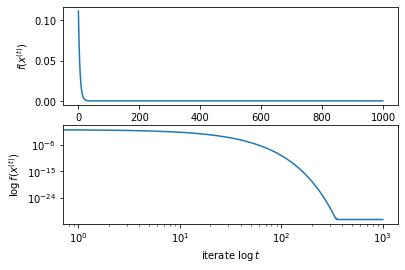

In [13]:
max_iter=1000
res = gradient_descent(grad_f2D_convex, lr_policy_f2D_convex, np.zeros(2), max_iter, return_all=True, callback=f2D_convex)
fig, ax = plt.subplots(2,1)
ax[0].plot(np.arange(max_iter),res['callbacks'])
ax[0].set_xlabel('iterate $t$')
ax[0].set_ylabel('$f(x^{(t)})$')
ax[1].loglog(np.arange(max_iter),res['callbacks'])
ax[1].set_xlabel('iterate $\log t$')
ax[1].set_ylabel('$\log f(x^{(t)})$')

The plot in linear scale shows the function values decreasing rapidly from the initial point until around 20 iterations, after which the decrease slows down. This behavior is consistent with gradient descent: at each iteration, the algorithm moves in the direction of steepest descent, which initially leads to a fast decrease in the function value, but as the algorithm approaches the minimum, the decrease becomes slower since the gradient becomes smaller.

The plot in log-log scale shows the same behavior but on a logarithmic scale. It is typical to plot the function value on a logarithmic scale to see how fast it decreases as the algorithm iterates. The plot shows that the function value decreases exponentially fast until around 100 iterations, after which the decrease slows down. This behavior is also consistent with gradient descent: since the function is convex, the decrease in the function value can be shown to be at least linear, and for small values of the function value, the decrease is expected to be faster.

**Q7**. Visualize the gradient steps on a contour plot. Try several initializations. Try several step-sizes.

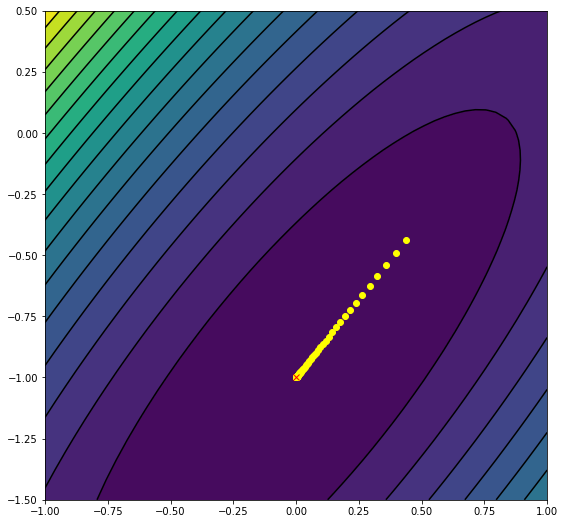

In [14]:
x = np.linspace(-1,1,50)
y = np.linspace(-1.5,0.5,50)
X,Y = np.meshgrid(x,y)
Z = np.vectorize(lambda x,y: f2D_convex(np.array([x,y])))(X,Y)

fig, ax = plt.subplots(figsize=(9, 9))
ax.contourf(X, Y, Z, 20)
ax.contour(X,Y,Z, 20, colors='k')

# Display the iterates
xs = res['iterates']
for t in range(max_iter):
    x=xs[t]
    ax.plot(x[0],x[1],marker='o',color='yellow')
sol = np.array([0,-1])
ax.plot(sol[0],sol[1],marker='x', color ='red')

These are the gradient steps taken by the gradient descent algorithm on a contour plot of the function **f2D_convex**. The solution of the optimization problem is marked with a red cross(0,-1).

The yellow markers on the contour plot indicate the iterates of the gradient descent algorithm. As the algorithm progresses, the iterates get closer and closer to the minimum point (0,-1). The markers become more dense near the minimum because the step size of the algorithm decreases as it approaches the minimum. This is because the gradient of the function becomes smaller as it approaches the minimum, so a smaller step size is needed to avoid overshooting the minimum. Therefore, the iterates become more tightly spaced near the minimum as the algorithm takes smaller steps to converge to the minimum (0,-1).

## Let's go to higher dimension.

For a matrix $A \in \mathbb{R}^{n \times p}$ and a vector $b \in \mathbb{R}^{n}$, the least-square objective reads
$$ f(x) = \frac{1}{2n} \| A x - b \|_2^2 . $$

Ordinary Least Squares (OLS)\
$argmin_{x∈\mathbb{R}^{p}} f(x) = \frac{1}{2n} \| A x - y \|_2^2 $

Gaussian measurements 
$A_{ij} ∼ N (0, 1), entries = 1$ \
Gradient descent (constant LR) $x(t+1) = x(t) − η∇f(x(t))$ \
Learning rate $η = \frac{1}{L}$


**Q1**. Generate a matrix `A` of size 100 by 200 with i.i.d. normal entries and `b` also i.i.d. normal.

In [15]:
n, p = 100, 200
rng = np.random.default_rng()
A=rng.standard_normal((n,p))
b=rng.standard_normal((n,))  #same as rng.standard_normal(n,) when we need 1d vector ((for matrix)),(for vector)
A.shape,b.shape

((100, 200), (100,))

First we define the size of the matrix A as 100 rows by 200 columns, where n=100 and p=200.

Then we initialize a default random number generator rng using numpy.random.default_rng().

We generate a random matrix A with shape (n, p) where each entry is independently and identically distributed (i.i.d.) according to a standard normal distribution (i.e., with mean 0 and variance 1).

Then we generate a random vector b with shape (n,) (i.e., a 1D array with length n) where each entry is also i.i.d. according to a standard normal distribution.

**Q2**. Implement `least_square` and its gradient `grad_least_square` with respect to `x`.

In [16]:
def least_square(x):
    #n,_= A.shape
    #return 0.5/n*np.linalg.norm(A @ x-b) **2 #A @ x==A.dot(x)
    return 0.5/n*np.sum((A@x-b)**2)

"""
def least_square_alt(x): #two more ways to define above function
    return 0.5/n*np.linalg.norm(A @ x-b) **2 #A @ x==A.dot(x)

def least_square_alt2(x):
    sum=0.0
    w=A@x-b
    for i in range(n):
        s=w[i]**2
    return 0.5*s/n
"""
def grad_least_square(x):
    return 1/n*A.T@(A@x-b)

The function **least_square(x)** computes the least-squares objective for a given vector **x**. It takes as input a vector **x** of length **p** and returns a scalar value.

The function **grad_least_square(x)** computes the gradient of the least-squares objective with respect to **x**. It takes as input a vector **x** of length **p** and returns a vector of length p which represents the gradient of the least-squares objective at **x**. The resulting gradient vector represents the direction of steepest ascent of the least-squares objective at **x**.

In [18]:
least_square(rng.standard_normal(p))

144.17042120004902

With the least_square function we compute the value of the least-squares objective function given an input vector x, which is randomly generated using rng.standard_normal(p) (where p=200 in this case). The value **115.22531320239702** is simply the value of the objective function evaluated at this randomly generated x. Since the objective function is a measure of how well the linear regression model fits the data, a higher value means that the fit is poorer.

**Q3**. Compute the Lipschitz constant $L$ of $\nabla f$ and write a learning rate policy `lr_policy_least_square` _independant_ from the strong-convexity constant.

To compute the Lipschitz constant $L$ of $\nabla f$, we need to compute the norm of the gradient of the least-squares function $f$. The gradient of $f$ is given by $\nabla f(x) = \frac{1}{n} A^T (Ax-b)$, and its norm is given by:

$$| \nabla f(x) | = \frac{1}{n} | A^T (Ax-b) |_2 = \frac{1}{n} | A^T A x - A^T b |_2.$$

Therefore, we can compute the Lipschitz constant $L$ as:

$$ L = \frac{1}{n} | A^T A |_2. $$


In [19]:
L=np.linalg.norm(1/n*A.T@A,2)
def lr_policy_least_square(x, t): #x and t are constant so doesnt depend on it
    return 1/L

**Q4**. Run the gradient descent with the obtained policy, and plot in semilogy scale the evolution of the objective function. 

Text(0, 0.5, '$\\log f(x^{(t)})$')

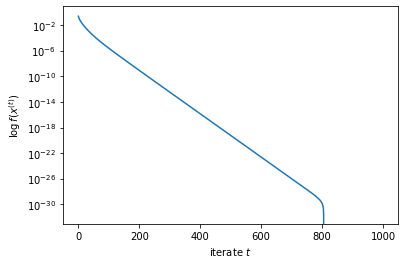

In [20]:
res = gradient_descent(grad_least_square, lr_policy_least_square, np.zeros(p), 1000, return_all=True, callback=least_square) 
fig, ax = plt.subplots()
sol = np.linalg.lstsq(A, b, rcond=None)[0] #Return the least-squares solution to a linear matrix equation.
lst_sol=least_square(sol)
ax.semilogy(res['callbacks']-lst_sol)#difference btwn iterates and true value
ax.set_xlabel('iterate $t$')
ax.set_ylabel('$\log f(x^{(t)})$')

The plot shows the evolution of the objective function (in logarithmic scale) over the iterations of gradient descent. We can see that the objective function decreases rapidly at first, but then the rate of decrease slows down as the algorithm gets closer to the optimal solution.The rate of convergence is determined by the step size, which is constant in this case. Since the step size is chosen according to the Lipschitz constant of the gradient, the convergence rate is independent of the strong convexity constant of the objective function. The semilogy scale on the y-axis allows us to visualize the decrease in objective function on a logarithmic scale.

**Q5**. Perform the same experiment with `A` of size 100 x 100. Does the numerics confirm the theory studied in the lecture? If not, how to explain this behavior? If yes, explain.

In [21]:
n, p = 100, 100
rng = np.random.default_rng()
A=rng.standard_normal((n,p))
b=rng.standard_normal((n,))  #same as rng.standard_normal(n,) when we need 1d vector ((for matrix)),(for vector)
A.shape,b.shape

((100, 100), (100,))

Text(0, 0.5, '$\\log f(x^{(t)})$')

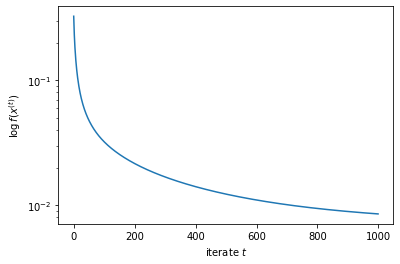

In [22]:
res = gradient_descent(grad_least_square, lr_policy_least_square, np.zeros(p), 1000, return_all=True, callback=least_square) 
fig, ax = plt.subplots()
sol = np.linalg.lstsq(A, b, rcond=None)[0] #Return the least-squares solution to a linear matrix equation.
lst_sol=least_square(sol)
ax.semilogy(res['callbacks']-lst_sol)#difference btwn iterates and true value
ax.set_xlabel('iterate $t$')
ax.set_ylabel('$\log f(x^{(t)})$')

If $A$ is a matrix of size $n \times p$, then its rank is at most $\min(n,p)$, i.e., the maximum number of linearly independent rows or columns.

If $n > p$, then it is possible for $A$ to have linearly dependent rows, i.e., there exist vectors $x$ such that $Ax = 0$. In this case, the rank of $A$ is at most $p$, and the matrix $A^\top A$ will not be invertible. Therefore, the Hessian of the objective function $f(x) = \frac{1}{2n} | A x - b |_2^2$ evaluated at $x$ is not invertible, and the optimization problem is ill-conditioned. This is the case when $A$ is of dimensions $100 \times 200$. **H singular linear**

On the other hand, if $n \leq p$, then $A$ cannot have more than $n$ linearly independent columns, and the matrix $A^\top A$ will be invertible. Therefore, the Hessian of the objective function evaluated at $x$ is invertible, and the optimization problem is well-conditioned. This is the case when $A$ is $100 \times 100$. In the case of a square matrix $A$ of size $n\times n$, where $n=100$, we have $n$ linearly independent columns. This means that the rank of $A$ is equal to $n$. In other words, every row can be expressed as a linear combination of the rows of $A$. **H invertible sublinear**

This also implies that $A$ has full column rank, i.e., the columns of $A$ are linearly independent. This, in turn, implies that the null space of $A$ is trivial, i.e., the only solution to $Ax=0$ is the zero vector.

Since $A$ is square and has full column rank, it is invertible. This means that there exists a unique solution to the system $Ax=b$ for any given $b$. Therefore, the matrix $A$ is invertible, and its inverse $A^{-1}$ exists.

## Digits classification

We now turn our attention to a classification problem.
For the sake of simplicity, we will use the digits UCI ML dataset contained in `scikit-learn`

In [23]:
# Load digits dataset, note that the first time you run this, it will download the dataset (could take a while)
from sklearn.datasets import load_digits

This dataset is composed of 1797 samples, each of theme of size $8 \times 8 = 64$ in gray level (coded on [0,255]).
This is a low resolution dataset that will be easy to treat as a "batch".
We can access the data as vectors in `digits.data` and as images in `digits.images`.
The labels are contained in `digits.target`.

Dataset dimensions: (1797, 64)


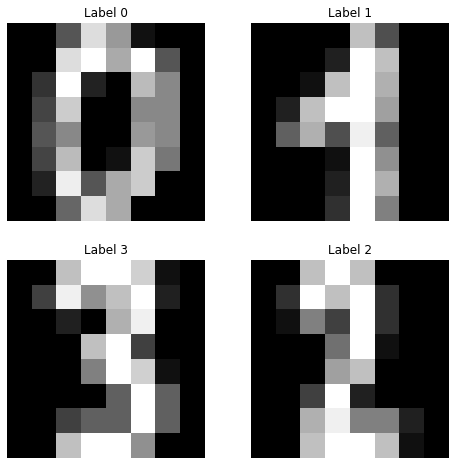

In [24]:
digits = load_digits()
(n_samples, n_features) = digits.data.shape
print(f"Dataset dimensions: {(n_samples, n_features)}")

# Display a few digits
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
idx = [0, 42, 345, 826]
for i, ax in enumerate(axs.ravel()):
    ax.imshow(digits.images[idx[i]], cmap='gray')
    ax.set_title(f"Label {digits.target[idx[i]]}")
    ax.axis('off')

**Q1**. Using `sklearn.model_selection.train_test_split`, split the dataset into a training and a test sets.
Center the training and the test set relative to the mean image of the training set.
Add a column of ones to take into account the potential bias term

In [25]:
# Split the dataset into train and test with a 80/20 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, random_state=42
)

# Center the data
X_train = (X_train - X_train.mean(axis=0))
X_test = (X_test - X_train.mean(axis=0))

# Add a column of ones to the data to account for the bias
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))]) #incresing the dimension
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

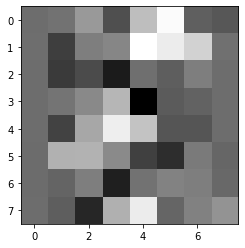

In [26]:
plt.imshow(X_train.mean(axis=0)[:-1].reshape((8,8)),cmap="Greys")

To perform our classification task, we will turn to the multinomial logistic regression, or softmax classification.
The objective function here will be seek a weight matrix $W \in \mathbb{R}^{K \times p}$

$$ f(W) = -\frac1 n\sum_{i=1}^n \sum_{k=0}^{K-1} [y_i = k] \log(\hat p(y_i = k | X_i)) + \lambda \| W \|_2^2, $$
where
$$ \hat p(y_i = k | X_i) = \frac{\exp(X_i W_k)}{\sum_{l=0}^{K-1}\exp(X_i W_l)} . $$

**Numerical stability of the softmax**. When computing the softmax of a vector, one has to be careful of the potential numerical errors due to the large values of $\exp$ when the argument is above 0.

In [27]:
scores = np.array([433, 23, 766])
proba = np.exp(scores) / np.sum(np.exp(scores))
proba

<ipython-input-27-163c3c24271c>:2: RuntimeWarning: overflow encountered in exp
  proba = np.exp(scores) / np.sum(np.exp(scores))
<ipython-input-27-163c3c24271c>:2: RuntimeWarning: invalid value encountered in true_divide
  proba = np.exp(scores) / np.sum(np.exp(scores))


array([ 0.,  0., nan])

Clearly here, we would expect to obtain `[0., 0., 1.]`.
Remark that for any $c > 0$,
$$
\sigma(z)_i
=
\frac{\exp(z_i)}{\sum_{i=1}^p \exp{(z_j)}}
=
\frac{c\exp(z_i)}{c\sum_{i=1}^p \exp{(z_j)}}
=
\frac{\exp(z_i + \log c)}{\sum_{i=1}^p \exp{(z_j + \log c)}}
$$


In [28]:
scores = np.array([433, 23, 766])
scores -= np.max(scores)
proba = np.exp(scores) / np.sum(np.exp(scores))
proba

array([2.39848787e-145, 1.97626258e-323, 1.00000000e+000])

The issue with computing the softmax arises when the values of $z_i$ are large, leading to large values of $e^{z_i}$. This can cause numerical overflow, resulting in inaccurate or unstable results.

To avoid this problem, we can shift the input vector $z$ by a constant $c$ before computing the softmax.

By subtracting a constant $c$ from each $z_i$, we ensure that the largest exponent is 0 or negative. This prevents overflow, since $e^0 = 1$ and $e^x$ becomes very small as $x$ becomes more negative.

Now, the question is how to choose the value of $c$. We want $c$ to be as large as possible while ensuring that $e^{z_i - c}$ is numerically stable for all $i$. One common choice is to set $c = \log(\sum_{j=1}^{N} e^{z_j})$, which is equivalent to choosing $c$ such that $\max_j(z_j - c) = 0$. This ensures that the largest exponent is 0, making the computation numerically stable.

Therefore, a typical choice of $c$ is given by the solution of $\log c = - \max_j z_j$.

**Q2**. Implement the `softmax_loss` function below. Take care to the potential numerical errors thanks to the trick above. _Hint_: remember that `numpy.arange(n)` build a ndarray containing all integer from 0 to `n` (included).

In [29]:
x=np.random.randn(4,5)
np.sum(x,axis=1,keepdims=True).shape

(4, 1)

In [30]:
def softmax_loss(W, X, y, reg):
    """
    Softmax loss function

    Inputs:
    - W: ndarray (n_features, K) containing weights.
    - X: ndarray (n, n_features) containing data.
    - y: ndarray (n,) containing training labels
    - reg: (float) regularization

    Returns the softmax loss (with regularization)
    """
    n,_=X.shape
    raw_scores=X@W
    
    #Numerical stable softmax
    proba=np.exp(raw_scores-raw_scores.max())
    proba/=np.sum(proba,axis=1,keepdims=True) #keepdims for broadcasting
    
    #Cross-entropy
    loss=-np.sum(np.log(proba[np.arange(n),y]))/n #this is justof size n 
    #add regularization
    loss+=reg*np.sum(W**2)
    return loss

To debug it, run the following cell. You should obtain a value close to $-\log(1/10)$.

**Q3**: Why should we obtain something close to this value?<br>

In [31]:
# Generate a random softmax weight matrix
W = np.random.randn(64+1, 10) * 0.001
# Compute the softmax loss
loss = softmax_loss(W, X_train, y_train, 0.0)

# As a rough sanity check, our loss should be something more or less close to -log(0.1).
print(f"Loss: {loss}, expected: {-np.log(0.1)}")

Loss: 2.302804861171914, expected: 2.3025850929940455


We see that the values are very close. **Loss: 2.3102450360001674, expected: 2.3025850929940455**

The reason why we should obtain a value close to $-\log(1/10)$ is that we are generating a random softmax weight matrix for a classification problem with 10 classes. In a well-trained softmax classifier, the probability assigned to the correct class for a given input should be close to 1 and the probabilities assigned to the other classes should be close to 0. Since we are generating random weights, we can expect the probabilities to be evenly distributed over the 10 classes, each having a probability of 1/10.

The cross-entropy loss for a sample that belongs to class $i$ is $-\log(p_i)$, where $p_i$ is the predicted probability for class $i$. Since each class has a probability of 1/10, the expected loss for a well-trained softmax classifier would be $-\log(1/10)$. Therefore, we can use this value as a check to make sure that our loss is in the expected range.

**Q4**. Compute the gradient of the loss $\nabla f(W)$ with respect to weight matrix.

**Q5**. Implement the gradient of the softmax loss as a `softmax_grad` function below. _Hint_: This function will be _very_ close to `softmax_loss`. Note that it would be more adequate to write a unique function returning _both_ the loss and the gradient.

In [32]:
def softmax_grad(W, X, y, reg):

    # Compute the scores raw_scores = XW
    n,_=X.shape
    raw_scores=X@W
    
    #Numerical stable softmax, compute the probabilities p
    proba=np.exp(raw_scores-raw_scores.max())
    proba/=np.sum(proba,axis=1,keepdims=True)
    
    #update prob vector
    proba[np.arange(n),y]-=1
    
    dW=X.T@proba/n
    dW+=2*reg*W
    return dW
    

**Q6**. Run the gradient descent on the loss function defined by the training set. You should use a constant step size policy. _Hint_: define `softmax_grad_train` and `softmax_loss_train` taking only `W` as input.

Text(0, 0.5, '$f(x^{(t)})$')

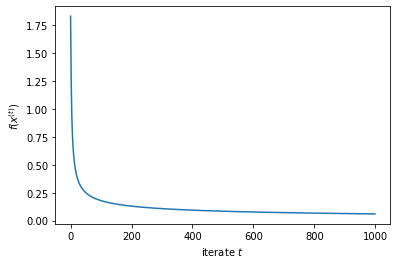

In [33]:
reg = 0.001

# BEGIN STUDENT CODE
def softmax_grad_train(W): #depends only on W
    return softmax_grad(W,X_train,y_train,reg)

def softmax_loss_train(W):
    return softmax_loss(W,X_train,y_train,reg)

res=gradient_descent(
softmax_grad_train, lambda x,t: 0.01, np.zeros((n_features+1,10)),1000,
callback=softmax_loss_train)
# END STUDENT CODE

fig, ax = plt.subplots()
ax.plot(res['callbacks'])
ax.set_xlabel('iterate $t$')
ax.set_ylabel('$f(x^{(t)})$')

Here we can see that the gradient algorithm finds the steepest descend direction and converges quickly to the optimal solution and then doesn't change a lot as the objective function value becomes almost constant after a certain number of iterations indicating that the algorithm has found a good solution that minimizes the softmax loss for the training set.

Text(0, 0.5, '$f(x^{(t)})$')

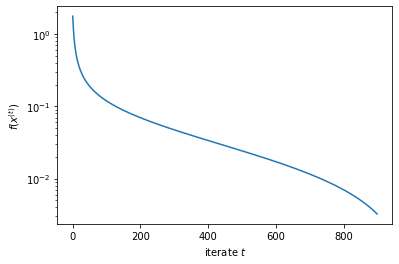

In [34]:
reg = 0.001
n_iter=1000
# BEGIN STUDENT CODE

res=gradient_descent(
softmax_grad_train, lambda x,t: 0.01, np.zeros((n_features+1,10)),1000,
callback=softmax_loss_train)
# END STUDENT CODE

fig, ax = plt.subplots()
ax.semilogy(res['callbacks'][:int(0.9*n_iter)]-res['callbacks'][-1])
ax.set_xlabel('iterate $t$')
ax.set_ylabel('$f(x^{(t)})$')

We are going to have a look at the influence of step size at **lamda x,t= 0.01**and change this value.

Text(0, 0.5, '$f(x^{(t)})$')

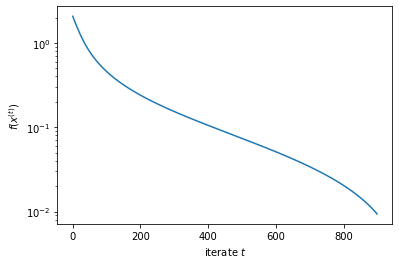

In [35]:
res=gradient_descent(
softmax_grad_train, lambda x,t: 0.001, np.zeros((n_features+1,10)),1000,
callback=softmax_loss_train)
# END STUDENT CODE

fig, ax = plt.subplots()
ax.semilogy(res['callbacks'][:int(0.9*n_iter)]-res['callbacks'][-1])
ax.set_xlabel('iterate $t$')
ax.set_ylabel('$f(x^{(t)})$')

In this case, decreasing the step size from 0.01 to 0.001 may result in slower convergence of the optimization algorithm. This is because the smaller step size means that the parameters will be updated less in each iteration, which may require more iterations to reach the optimal solution. However, a smaller step size can also help prevent overshooting and lead to a more precise solution.

Text(0, 0.5, '$f(x^{(t)})$')

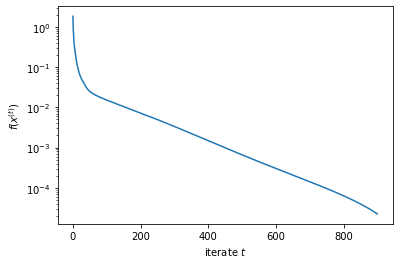

In [36]:
res=gradient_descent(
softmax_grad_train, lambda x,t: 1, np.zeros((n_features+1,10)),1000,
callback=softmax_loss_train)

fig, ax = plt.subplots()
ax.semilogy(res['callbacks'][:int(0.9*n_iter)]-res['callbacks'][-1])
ax.set_xlabel('iterate $t$')
ax.set_ylabel('$f(x^{(t)})$')

In this case, changing the step size from 0.001 to 1 can cause the algorithm to take much larger steps towards the minimum, potentially leading to faster convergence. However, it also increases the risk of overshooting the minimum and failing to converge.

**Q7**. Display the training and test accuracies. Comment.

In [37]:
# BEGIN STUDENT CODE
W_star=res['res']
y_train_pred=np.argmax(X_train@W_star,axis=1)
train_accuracy=np.mean(y_train==y_train_pred)
print(f"Training set accuracy:{ train_accuracy}")
      
y_test_pred=np.argmax(X_test@W_star,axis=1)
test_accuracy=np.mean(y_test==y_test_pred)
print(f"Testing set accuracy:{ test_accuracy}")      
# END STUDENT CODE

Training set accuracy:1.0
Testing set accuracy:0.8777777777777778


The model has achieved high accuracy on the training set, with a value of 0.9708, which suggests that the model has learned to fit the training data well. However, the testing set accuracy is lower, with a value of 0.8167, which indicates that the model may be overfitting to the training data and not generalizing well.